In [2]:
import nwhy
import hypernetx as hnx
import networkx as nx
from networkx import Graph
import os
import numpy as np
import csv
import pickle

/home/ahsun/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ahsun/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ahsun/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ahsun/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
path = r'/mnt/c/pythonProjects/591-newyork-times/archive'

In [4]:
print(os.listdir(path))

['ArticlesApril2017.csv', 'ArticlesApril2018.csv', 'ArticlesFeb2017.csv', 'ArticlesFeb2018.csv', 'ArticlesJan2017.csv', 'ArticlesJan2018.csv', 'ArticlesMarch2017.csv', 'ArticlesMarch2018.csv', 'ArticlesMay2017.csv', 'CommentsApril2017.csv', 'CommentsApril2018.csv', 'CommentsFeb2017.csv', 'CommentsFeb2018.csv', 'CommentsJan2017.csv', 'CommentsJan2018.csv', 'CommentsMarch2017.csv', 'CommentsMarch2018.csv', 'CommentsMay2017.csv']


In [76]:
paths_articles = []
paths_comments = []

articles_file_path_jan = path + '/' +'ArticlesJan2018.csv'
paths_articles.append(articles_file_path_jan)
comments_file_path_jan = path + '/' + 'CommentsJan2018.csv'
paths_comments.append(comments_file_path_jan)

articles_file_path_feb = path + '/' +'ArticlesFeb2018.csv'
paths_articles.append(articles_file_path_feb)
comments_file_path_feb = path + '/' + 'CommentsFeb2018.csv'
paths_comments.append(comments_file_path_feb)


articles_file_path_march = path + '/' +'ArticlesMarch2018.csv'
paths_articles.append(articles_file_path_march)
comments_file_path_march = path + '/' + 'CommentsMarch2018.csv'
paths_comments.append(comments_file_path_march)

articles_file_path_april = path + '/' +'ArticlesApril2018.csv'
# paths_articles.append(articles_file_path_april)
comments_file_path_april = path + '/' + 'CommentsApril2018.csv'
# paths_comments.append(comments_file_path_april)

print(paths_articles)
print(paths_comments)

['/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesJan2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesFeb2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesMarch2018.csv']
['/mnt/c/pythonProjects/591-newyork-times/archive/CommentsJan2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/CommentsFeb2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/CommentsMarch2018.csv']


In [4]:
def createDictionary(array_of_dictionaries):
    dictionary = array_of_dictionaries[0]
    for i in range(1, len(array_of_dictionaries)):
        dictionary.update(array_of_dictionaries[i])
    return dictionary
        

In [28]:
def findMax(dictionary):
    mx = 0
    max_key = -1
    for key in dictionary:
        if dictionary[key] > mx:
            mx = dictionary[key] 
            max_key = key
    return (max_key,mx)

In [29]:
def findMin(dictionary):
    mn = 1
    min_key = -1
    for key in dictionary:
        if dictionary[key] < mn:
            mn = dictionary[key] 
            min_key = key
    return (min_key,mn)

In [77]:
articles  = {}

count = 0
for articles_file_path in paths_articles:

    with open(articles_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 0
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "articleID":
                index =i
        for row in csv_reader:
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            articles[row[index]]= createDictionary(record)
            count += 1
print(count)
print(len(articles))

3445
3445
1486


In [78]:
print(authors)

{'By JOHN KOBLIN and MICHAEL M. GRYNBAUM', 'By GUY TREBAY', 'By JAKE NAUGHTON', 'By KEITH WILLIAMS', 'By MICHAEL CORKERY and KATIE THOMAS', 'By DONALD G. McNEIL Jr', 'By NANCY HASS', 'By KEVIN DRAPER', 'By ALAN LIGHT', 'By NICHOLAS BAKALAR', 'By DAVID GELLES', 'By SUSAN SHAIN', 'By LISA FRIEDMAN', 'By MARIE TAE McDERMOTT', 'By KATIE ROGERS and PETER BAKER', 'By LISA FOGARTY', 'By MEADOW RUE MERRILL', 'By DOUGLAS QUENQUA', 'By ALAN BLINDER', 'By JENNIFER MEDINA', 'By KATE KELLY and MAGGIE HABERMAN', 'By JOE SCHUB', 'By ADAM POPESCU', 'By SIMON VOZICK-LEVINSON', 'By RON NIXON, LIZ ROBBINS and KATIE BENNER', 'By AYN-MONIQUE KLAHRE', 'By DAVID D. KIRKPATRICK and MARK MAZZETTI', 'By WILLIAM L. HAMILTON', 'By JEFFREY PENN', 'By THOMAS FULLER and VIVIAN YEE', 'By KENNETH P. VOGEL and KATIE ROGERS', 'By ALAN BLINDER and NICOLE PERLROTH', 'By CHARLIE SAVAGE and JACK HEALY', 'By TIM McKEOUGH', 'By J. DAVID GOODMAN', 'By KEVIN ROOSE', 'By CHRISTOPHER PAYNE and SAM ANDERSON', 'By KAREN STABINER', 

In [6]:
files = os.listdir()
if not "articles.pickle" in files:
    with open('articles.pickle', 'wb') as f:
        print("dumping articles into articles.pickle....")
        pickle.dump(articles, f)
else:
    with open("articles.pickle", "rb") as f:
        print("loaded articles from articles.pickle..")
        articles = pickle.load(f)
print(len(articles))


loaded articles from articles.pickle..
3445


In [8]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break
    

{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html'}
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['United States Politics and Government', 'Federal Bu

In [3]:
comments = {}
num = 0
for comments_file_path in paths_comments:
    with open(comments_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 4
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "commentID":
                index =i
        for row in csv_reader:
            num+=1
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            dictionary = createDictionary(record)
            if dictionary["articleID"] in articles.keys():
                comments[str(row[index])] = dictionary
            
print(num)
print(f'total comments: {len(comments)}')

NameError: name 'paths_comments' is not defined

In [7]:
files = os.listdir()
if not "comments.pickle" in files:
    with open('comments.pickle', 'wb') as f:
        print("dumping comments into comments.pickle....")
        pickle.dump(comments, f)
else:
    with open("comments.pickle", "rb") as f:
        print("loaded comments from comments.pickle..")
        comments = pickle.load(f)
        
print(len(comments))

loaded comments from comments.pickle..
640904


In [10]:
count = 0
for ID in comments:
    print(ID)
    print(comments[ID])
    count +=1
    if count==5:
        break

26156416.0
{'approveDate': '1519852022', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'commentBody': 'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.', 'commentID': '26156416.0', 'commentSequence': '26156416.0', 'commentTitle'

In [11]:
for commentID in comments:
    articleID = comments[commentID]["articleID"] 
    if not "num_comments" in articles[articleID]:
        articles[articleID]["num_comments"] = 1
    else:
        articles[articleID]["num_comments"] += 1



In [12]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break

{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html', 'num_comments': 25}
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['United States Politics and Gove

In [8]:
total_comments = 0
article_with_most_comments = {}
maxnum = 0
for articleID in articles:
    total_comments += articles[articleID]["num_comments"]
    if articles[articleID]["num_comments"] > maxnum:
        maxnum = articles[articleID]["num_comments"]
        article_with_most_comments = articles[articleID]
print(total_comments)
print(article_with_most_comments)
print(maxnum)

640904
{'articleID': '5aba12a547de81a901217c97', 'byline': 'By JOHN PAUL STEVENS', 'documentType': 'article', 'headline': 'Repeal the Second Amendment', 'keywords': "['Gun Control', 'Second Amendment (US Constitution)', 'Law and Legislation', 'Supreme Court (US)']", 'multimedia': '1', 'newDesk': 'OpEd', 'printPage': '23', 'pubDate': '2018-03-27 09:45:06', 'sectionName': 'Unknown', 'snippet': 'This weekend’s marches make it clear: To enact real gun control, we need to change the Constitution.', 'source': 'The New York Times', 'typeOfMaterial': 'Op-Ed', 'webURL': 'https://www.nytimes.com/2018/03/27/opinion/john-paul-stevens-repeal-second-amendment.html', 'articleWordCount': '539', 'num_comments': 2927}
2927


In [77]:
articles_to_commenters = {articles[ID]["articleID"]:set({}) for ID in articles}
users = {}
for ID in comments:
    articleID = comments[ID]["articleID"]
    userID = comments[ID]["userID"]
    userTitle  = "unknown"
    userLocation = "unknown"
    if "userTitle" in comments[ID].keys():
        userTitle = comments[ID]["userTitle"]
    if "userLocation" in comments[ID].keys():
        userLocation = comments[ID]["userLocation"]
        
    users[userID] = {"userTitle":userTitle, "location":userLocation}    
    articles_to_commenters[articleID].add(userID)
    

    
print(f'{len(users)} users found')

for i, ID in enumerate(users):
    print(ID)
    print(users[ID])
    if i==5:
        break

for i, ID in enumerate(articles_to_commenters):
    print(ID)
    print(articles_to_commenters[ID])
    if i==5:
        break

113089 users found
83288014.0
{'userTitle': '', 'location': 'Wilmington, NC'}
53167641.0
{'userTitle': '', 'location': 'San Francisco'}
44043675.0
{'userTitle': '', 'location': 'Chicago'}
84748907.0
{'userTitle': '', 'location': 'New York, NY'}
25854823.0
{'userTitle': '', 'location': 'Colorado'}
37084925.0
{'userTitle': '', 'location': 'Brasil'}
5a7101c110f40f00018be961
{'37084925.0', '36791354.0', '2734975.0', '43839882.0', '8953756.0', '53806807.0', '44043675.0', '84748907.0', '17660585.0', '83288014.0', '53167641.0', '76739035.0', '81222604.0', '78273096.0', '25854823.0', '49331282.0', '28180820.0', '27581854.0', '77964859.0', '76084824.0', '35080129.0', '30515740.0', '36234712.0'}
5a70fc1210f40f00018be950
{'49057690.0', '84656120.0', '62978371.0', '73849396.0', '830455.0', '69433294.0', '27822875.0', '76321569.0', '79300155.0', '34963770.0', '5161936.0', '49437764.0', '46829210.0', '62856899.0', '1378024.0', '79151495.0', '60025659.0', '6967505.0', '67820750.0', '66537945.0', '106

In [9]:
files = os.listdir()
if not "users.pickle" in files:
    with open('users.pickle', 'wb') as f:
        print("dumping users into users.pickle....")
        pickle.dump(users, f)
else:
    with open("users.pickle", "rb") as f:
        print("loaded users from users.pickle..")
        users = pickle.load(f)
print(len(users))

loaded users from users.pickle..
113089


In [10]:
files = os.listdir()
if not "articles_to_commenters.pickle" in files:
    with open('articles_to_commenters.pickle', 'wb') as f:
        print("dumping articles_to_commenters into articles_to_commenters.pickle....")
        pickle.dump(articles_to_commenters, f)
else:
    with open("articles_to_commenters.pickle", "rb") as f:
        print("loaded articles_to_commenters from articles_to_commenters.pickle..")
        articles_to_commenters = pickle.load(f)
print(len(articles_to_commenters))

loaded articles_to_commenters from articles_to_commenters.pickle..
3445


In [11]:
a = hnx.Entity('a',{1,2})
b = hnx.Entity('b',{2,3})
E = hnx.EntitySet('sample',elements=[a,b])
H =hnx.Hypergraph(E,static=True)
hnx.Hypergraph(E)



Hypergraph({'a': Entity(a,[1, 2],{'weight': 1.0}), 'b': Entity(b,[2, 3],{'weight': 1.0})},name=)

In [8]:
hnx.Hypergraph(E).edges

EntitySet(:Edges,['b', 'a'],{'weight': 1.0})

In [26]:
edges = hnx.Hypergraph(E).edges

id_to_node = {}
for i, thing in enumerate(edges):
    id_to_node[i] = thing
    
print(id_to_node)

{0: 'a', 1: 'b'}


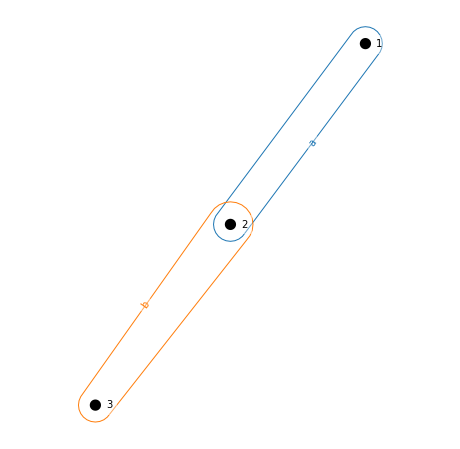

In [12]:
hnx.drawing.rubber_band.draw(H)

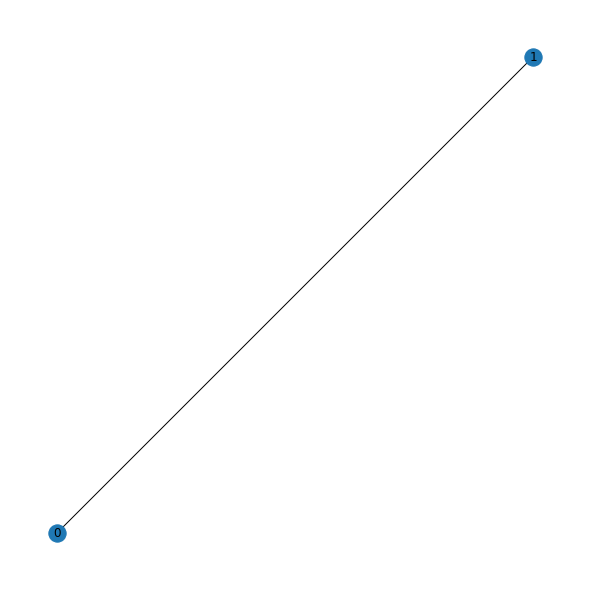

In [13]:
dummy_linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)
nx.draw(dummy_linegraph,with_labels = True)

In [11]:
entities = []
for articleID in articles_to_commenters:
    entities.append(hnx.Entity(articleID,articles_to_commenters[articleID]))
    
E = hnx.EntitySet('articles_commenters',elements=entities)
H = hnx.Hypergraph(E,static=True)

In [28]:
edges = hnx.Hypergraph(E).edges

id_to_node_articles_comments = {}
for i, thing in enumerate(edges):
    id_to_node_articles_comments[i] = thing
    

In [12]:
files = os.listdir()
if not "id_to_node_articles_comments.pickle" in files:
    with open('id_to_node_articles_comments.pickle', 'wb') as f:
        print("dumping id_to_node_articles_comments into id_to_node_articles_commentss.pickle....")
        pickle.dump(id_to_node_articles_comments, f)
else:
    with open("id_to_node_articles_comments.pickle", "rb") as f:
        print("loaded id_to_node_articles_comments from id_to_node_articles_comments.pickle..")
        id_to_node_articles_comments = pickle.load(f)
print(len(id_to_node_articles_comments))

loaded id_to_node_articles_comments from id_to_node_articles_comments.pickle..
3445


In [13]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)

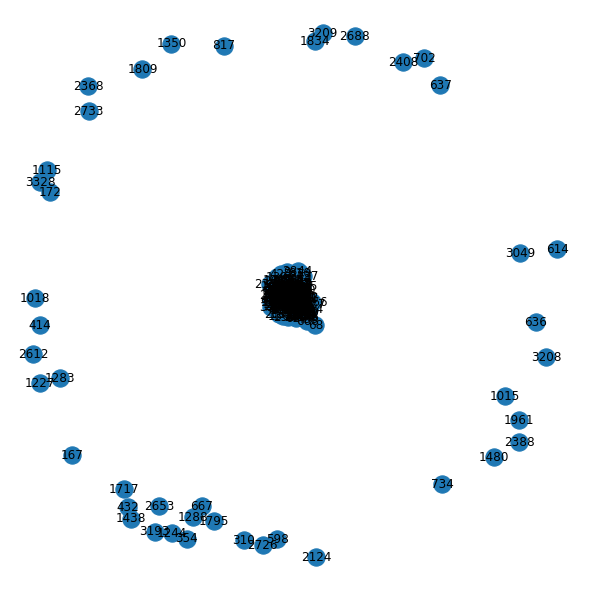

In [57]:
# hnx.drawing.rubber_band.draw(H)
nx.draw(linegraph,with_labels = True)

In [19]:
deg = list(linegraph.degree)
print(deg[0:2])
maxdeg =0 
node_maxdeg = None
for tp in deg:
    if tp[1] > maxdeg:
        maxdeg = tp[1]
        node_maxdeg = tp[0]
print(node_maxdeg,maxdeg)  

[(0, 383), (1, 1674)]
3220 2626


In [60]:
print(articles[id_to_node_articles_comments[3220]])

{'articleID': '5aba12a547de81a901217c97', 'byline': 'By JOHN PAUL STEVENS', 'documentType': 'article', 'headline': 'Repeal the Second Amendment', 'keywords': "['Gun Control', 'Second Amendment (US Constitution)', 'Law and Legislation', 'Supreme Court (US)']", 'multimedia': '1', 'newDesk': 'OpEd', 'printPage': '23', 'pubDate': '2018-03-27 09:45:06', 'sectionName': 'Unknown', 'snippet': 'This weekend’s marches make it clear: To enact real gun control, we need to change the Constitution.', 'source': 'The New York Times', 'typeOfMaterial': 'Op-Ed', 'webURL': 'https://www.nytimes.com/2018/03/27/opinion/john-paul-stevens-repeal-second-amendment.html', 'articleWordCount': '539', 'num_comments': 2927}


In [14]:
pagerank_articles_comments_1 = nx.pagerank_numpy(linegraph)

/tmp/ipykernel_340/954388044.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_articles_comments_1 = nx.pagerank_numpy(linegraph)
/home/ahsun/.local/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [ ]:
# print(len(pagerank_articles_comments))

In [40]:
findMax(pagerank_articles_comments_1)

(3044, 0.0007421448534650462)

In [34]:
findMin(pagerank_articles_comments_1)

(167, 4.4008273555428475e-05)

In [74]:
pagerank_articles_comments_1[3044]

0.0007421448534650462

In [66]:
print(articles[id_to_node_articles_comments[3044]])

{'articleID': '5ab3fc5e47de81a901215795', 'byline': 'By FRANK BRUNI', 'documentType': 'article', 'headline': 'Cynthia Nixon and the Age of Inexperience', 'keywords': "['United States Politics and Government', 'Celebrities', 'Nixon, Cynthia', 'New York State', 'Elections, Governors']", 'multimedia': '1', 'newDesk': 'OpEd', 'printPage': '3', 'pubDate': '2018-03-22 18:56:25', 'sectionName': 'Sunday Review', 'snippet': 'In politics, too, training and knowledge matter. Hasn’t Trump taught us that?', 'source': 'The New York Times', 'typeOfMaterial': 'Op-Ed', 'webURL': 'https://www.nytimes.com/2018/03/22/opinion/cynthia-nixon-experience-governor-ny.html', 'articleWordCount': '1150', 'num_comments': 1354}


In [72]:
print(articles[id_to_node_articles_comments[167]])

{'abstract': '', 'articleID': '5a6a298810f40f00018bdbb5', 'articleWordCount': '6681', 'byline': 'By THE LEARNING NETWORK', 'documentType': 'article', 'headline': 'Race in America, College Amenities and Loneliness: Our Favorite Student Comments of the Week', 'keywords': '[]', 'multimedia': '68', 'newDesk': 'Learning', 'printPage': '0', 'pubDate': '2018-01-25 19:01:21', 'sectionName': 'Unknown', 'snippet': 'Our favorite student comments from last week, and an invitation to join the conversation this week.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/25/learning/what-did-you-read-watch-or-listen-to-in-the-times-this-week.html', 'num_comments': 1}


In [70]:
print(deg[3044])

(3044, 2576)


In [30]:
pagerank_articles_comments_2 = nx.pagerank(linegraph)

In [37]:
print(len(pagerank_articles_comments))

3445


In [31]:
findMax(pagerank_articles_comments)

NameError: name 'pagerank_articles_comments' is not defined

In [68]:
closeness_articles_comments = nx.closeness_centrality(linegraph)

KeyboardInterrupt: 

In [67]:
findMax(closeness_articles_comments)

NameError: name 'closeness_articles_comments' is not defined